In [ ]:
import pandas as pd
df = pd.read_csv(r"/content/drive/MyDrive/Final_Data/Liver_Patient_Dataset_train.csv",encoding= 'unicode_escape')

#Sex
df['Gender of the patient'] = df['Gender of the patient'].apply(lambda ss: 1 if ss=="Male" else 0)

#刪除缺失值
df.isna().sum()
df.dropna(inplace=True)

#刪除無關feature (Gender & Age)
df.drop( ['Age of the patient'], axis=1, inplace=True )
df.drop( ['Gender of the patient'], axis=1, inplace=True )

#正規化
from sklearn import preprocessing as pp
pp.normalize(df)

x = df.drop(['Result'],axis=1)
y = df['Result']

<Axes: >

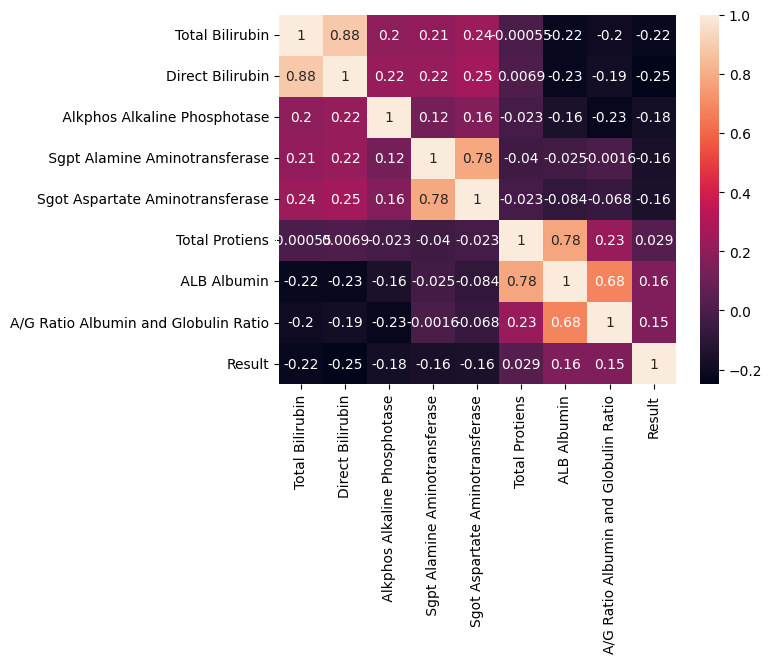

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [ ]:
#Decision Tree
from sklearn import datasets,model_selection,tree,metrics
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size=0.1,random_state=42)
dtc = tree.DecisionTreeClassifier(max_depth=10)
dtc.fit(x_train,y_train)
print(metrics.classification_report(y_true=y_test,y_pred=dtc.predict(x_test)))
metrics.confusion_matrix(y_true=y_test,y_pred=dtc.predict(x_test))

predictions = dtc.predict(x_test)

print("Score:")
print(dtc.score(x_train,y_train))
print('預測結果：\n',predictions)

              precision    recall  f1-score   support

           1       0.90      0.97      0.93      1974
           2       0.91      0.72      0.80       793

    accuracy                           0.90      2767
   macro avg       0.90      0.85      0.87      2767
weighted avg       0.90      0.90      0.90      2767

Score:
0.8999156592634242
預測結果：
 [2 1 1 ... 2 1 1]


In [ ]:
#Random Forest
import pydotplus
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10,max_depth=10)
forest.fit(x_train,y_train)
predictions = forest.predict(x_test)

print("Score:")
print(forest.score(x_train,y_train))
print('預測結果：\n',predictions)

print(metrics.classification_report(y_true=y_test,y_pred=dtc.predict(x_test)))

#生成圖
i=0
for per_rf in forest.estimators_:
    dot_data = tree.export_graphviz(per_rf, out_file=None,
                         feature_names=x_train.columns,
                         class_names=['0','1'],
                         filled=True, rounded=True,
                         special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    i = i+1
    graph.write_pdf(str(i)+"DTtree.pdf")

Score:
0.9883529459014418
預測結果：
 [2 1 1 ... 2 2 1]
              precision    recall  f1-score   support

           1       0.90      0.97      0.93      1974
           2       0.91      0.72      0.80       793

    accuracy                           0.90      2767
   macro avg       0.90      0.85      0.87      2767
weighted avg       0.90      0.90      0.90      2767



In [ ]:
metrics.confusion_matrix(y_true=y_test,y_pred=dtc.predict(x_test))

array([[1916,   58],
       [ 221,  572]])

In [ ]:
#訓練模型 Linear SVM
from sklearn.svm import LinearSVC
linear_svm = LinearSVC()
linear_svm.fit(x_train,y_train)
predictions = linear_svm.predict(x_test)

print("Score:")
print(linear_svm.score(x_train,y_train))
print('預測結果：\n',predictions)

Score:
0.7108317603116591
預測結果：
 [1 1 1 ... 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
#訓練模型 NonLinear SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)
predictions = svm.predict(x_test)

print("Score:")
print(svm.score(x_train,y_train))
print('預測結果：\n',predictions)

Score:
0.7189445359251375
預測結果：
 [1 1 1 ... 1 1 1]


In [ ]:
#訓練模型 Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
predictions = log_reg.predict(x_test)

print("Score:")
print(log_reg.score(x_train,y_train))
print('預測結果：\n',predictions)

Score:
0.7262139041728584
預測結果：
 [1 1 1 ... 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
